In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Preparation and Exploration

In [4]:
df = pd.read_csv('adult.data.csv', names = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
                                            'Marital-Status', 'Occupation', 'Relationship', 'Race', 
                                            'Sex', 'Capital-gain','Capital-loss', 'Hours-per-week', 
                                            'Native-country', 'Income'], 
                 skipinitialspace = True, na_values = ['?'])
df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.describe(include = 'all')

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-num     32561 non-null int64
Marital-Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital-gain      32561 non-null int64
Capital-loss      32561 non-null int64
Hours-per-week    32561 non-null int64
Native-country    31978 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Analyzing Income

<=50K    24720
>50K      7841
Name: Income, dtype: int64

Text(0.5,1,'Count (Income)')

Text(0,0.5,'Frequency')

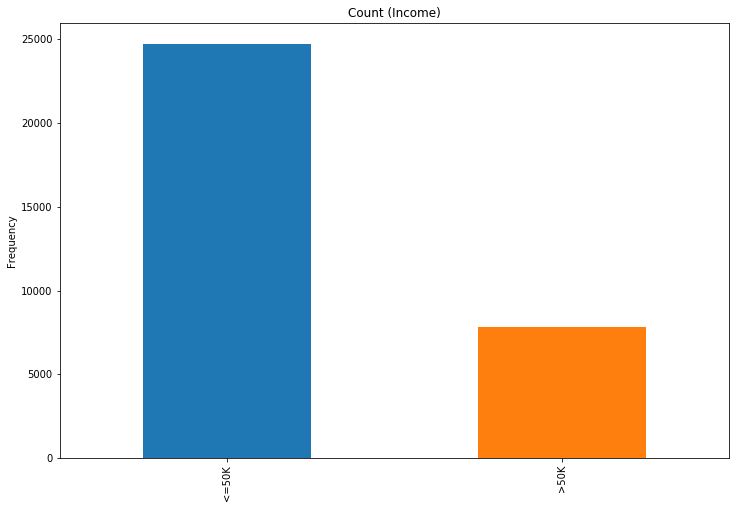

In [8]:
val_count = df['Income'].value_counts()
val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Count (Income)')
plt.ylabel('Frequency')

### Dropping Null Values

In [9]:
df.dropna(inplace = True)

### Balancing the Data

<=50K    7508
>50K     7508
Name: Income, dtype: int64

Text(0.5,1,'Count (Income)')

Text(0,0.5,'Frequency')

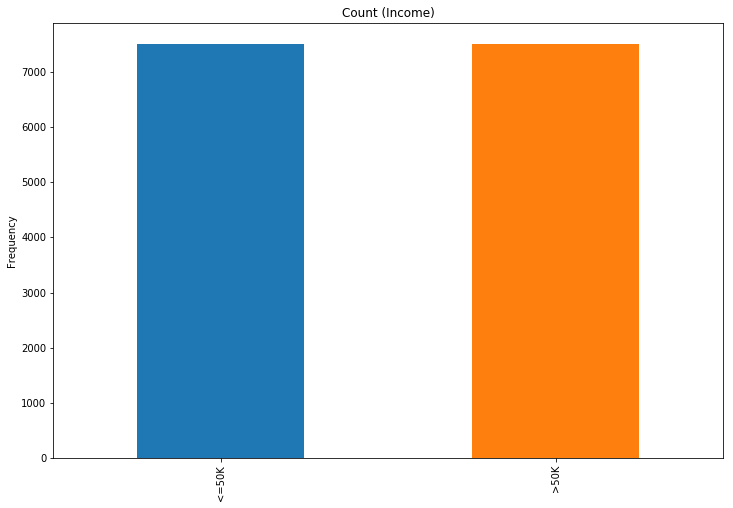

In [10]:
count_class_0, count_class_1 = df.Income.value_counts()

df_class_0 = df[df['Income'] == '<=50K']
df_class_1 = df[df['Income'] == '>50K']

df_class_0_under = df_class_0.sample(count_class_1, random_state = 42)
df = pd.concat([df_class_0_under, df_class_1], axis=0)

df.Income.value_counts()

ax = df.Income.value_counts().plot.bar(figsize = [12,8])
plt.title('Count (Income)')
plt.ylabel('Frequency')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15016 entries, 9889 to 32560
Data columns (total 15 columns):
Age               15016 non-null int64
Workclass         15016 non-null object
fnlwgt            15016 non-null int64
Education         15016 non-null object
Education-num     15016 non-null int64
Marital-Status    15016 non-null object
Occupation        15016 non-null object
Relationship      15016 non-null object
Race              15016 non-null object
Sex               15016 non-null object
Capital-gain      15016 non-null int64
Capital-loss      15016 non-null int64
Hours-per-week    15016 non-null int64
Native-country    15016 non-null object
Income            15016 non-null object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


## Analyzing Qualitative Variables

### Income vs. Workclass

Income        
Income             <=50K    >50K
Workclass                       
Federal-gov        210.0   365.0
Local-gov          488.0   609.0
Private           5750.0  4876.0
Self-emp-inc       168.0   600.0
Self-emp-not-inc   570.0   714.0
State-gov          317.0   344.0
Without-pay          5.0     NaN

Text(0.5,1,'Income vs Workclass')

Text(0,0.5,'Frequency')

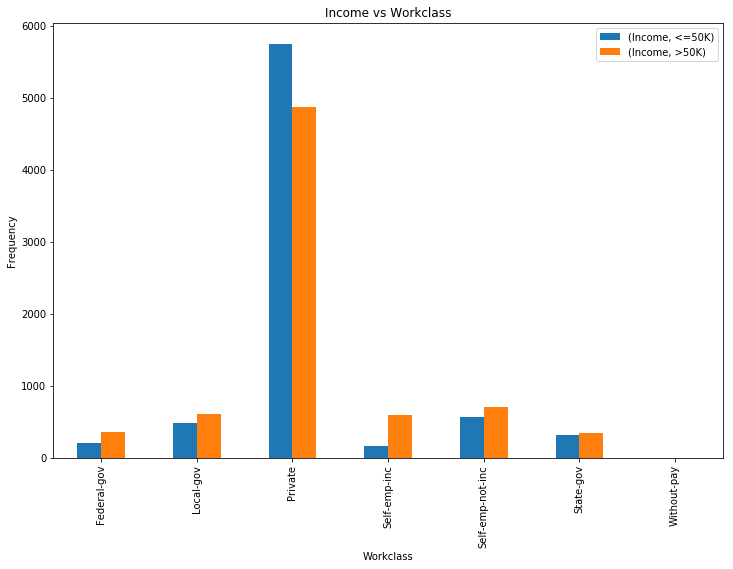

In [12]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Workclass'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Workclass')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

### Income vs Education

Income        
Income         <=50K    >50K
Education                   
10th           251.0    59.0
11th           338.0    59.0
12th            95.0    29.0
1st-4th         62.0     6.0
5th-6th         84.0    12.0
7th-8th        179.0    35.0
9th            143.0    25.0
Assoc-acdm     253.0   256.0
Assoc-voc      324.0   344.0
Bachelors      944.0  2126.0
Doctorate       29.0   280.0
HS-grad       2713.0  1617.0
Masters        232.0   918.0
Preschool       14.0     NaN
Prof-school     56.0   406.0
Some-college  1791.0  1336.0

Text(0.5,1,'Income vs Education')

Text(0,0.5,'Frequency')

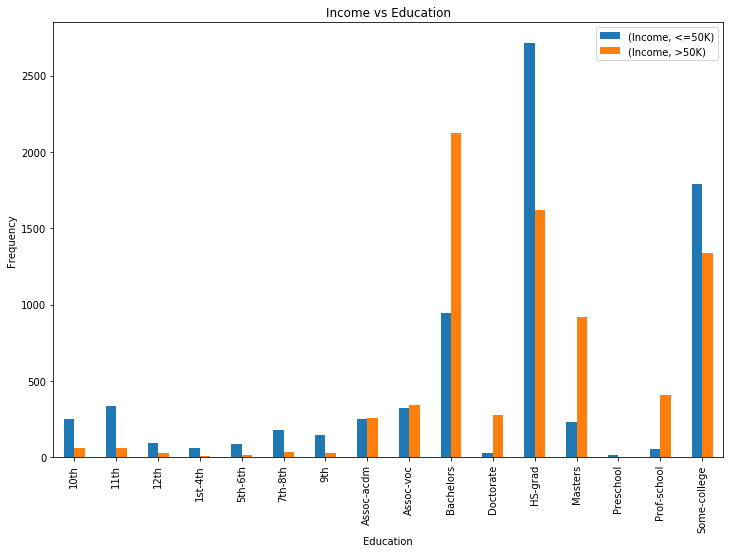

In [13]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Education'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Education')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

### Income vs Marital-Status

Income      
Income                 <=50K  >50K
Marital-Status                    
Divorced                1232   452
Married-AF-spouse          3    10
Married-civ-spouse      2562  6399
Married-spouse-absent    107    31
Never-married           3064   470
Separated                279    66
Widowed                  261    80

Text(0.5,1,'Income vs Marital-Status')

Text(0,0.5,'Frequency')

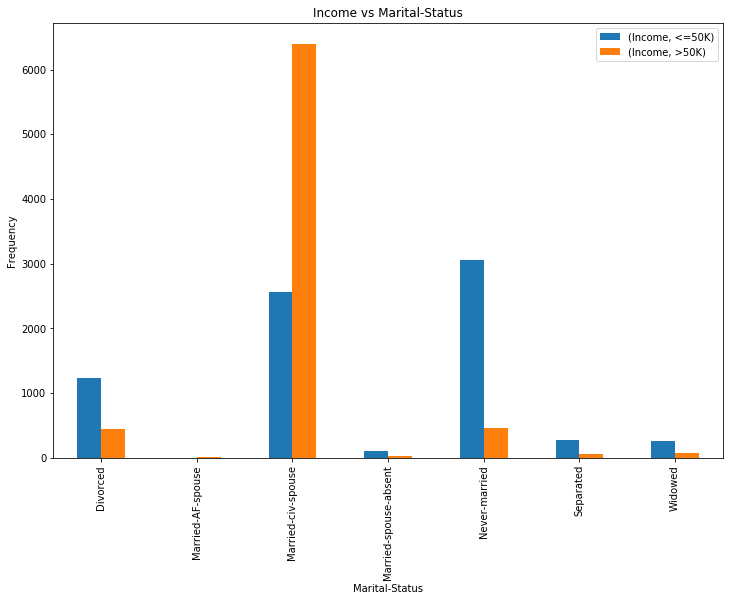

In [14]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Marital-Status'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Marital-Status')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

### Income vs Occupation

Income      
Income             <=50K  >50K
Occupation                    
Adm-clerical        1045   498
Armed-Forces           1     1
Craft-repair        1047   908
Exec-managerial      653  1937
Farming-fishing      295   115
Handlers-cleaners    434    83
Machine-op-inspct    562   245
Other-service       1003   132
Priv-house-serv       48     1
Prof-specialty       751  1811
Protective-serv      149   210
Sales                853   970
Tech-support         227   278
Transport-moving     440   319

Text(0.5,1,'Income vs Occupation')

Text(0,0.5,'Frequency')

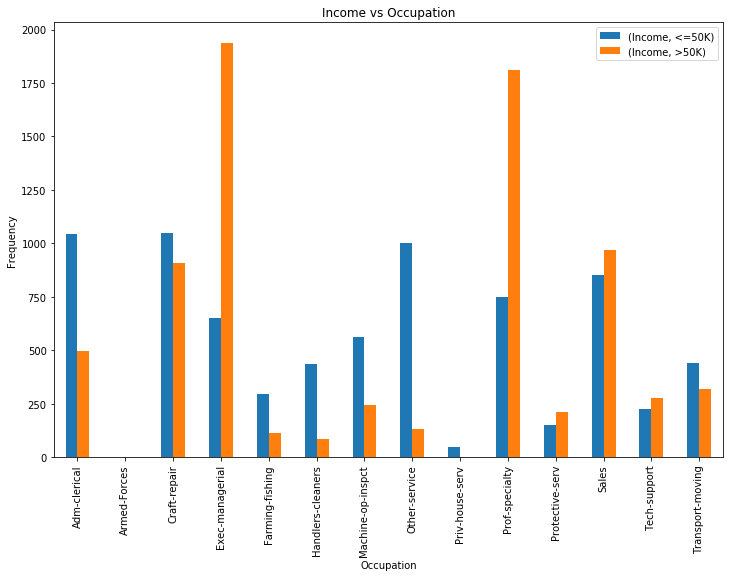

In [17]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Occupation'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Occupation')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

### Income vs Relationship

Income      
Income          <=50K  >50K
Relationship               
Husband          2255  5679
Not-in-family    2319   823
Other-relative    288    35
Own-child        1426    64
Unmarried         985   213
Wife              235   694

Text(0.5,1,'Income vs Relationship')

Text(0,0.5,'Frequency')

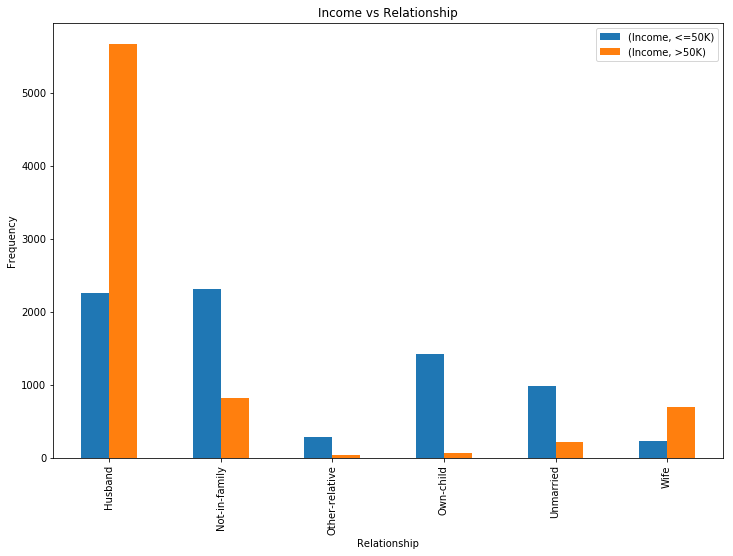

In [18]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Relationship'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Relationship')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

### Income vs Race

Income      
Income              <=50K  >50K
Race                           
Amer-Indian-Eskimo     78    34
Asian-Pac-Islander    208   248
Black                 821   366
Other                  85    21
White                6316  6839

Text(0.5,1,'Income vs Race')

Text(0,0.5,'Frequency')

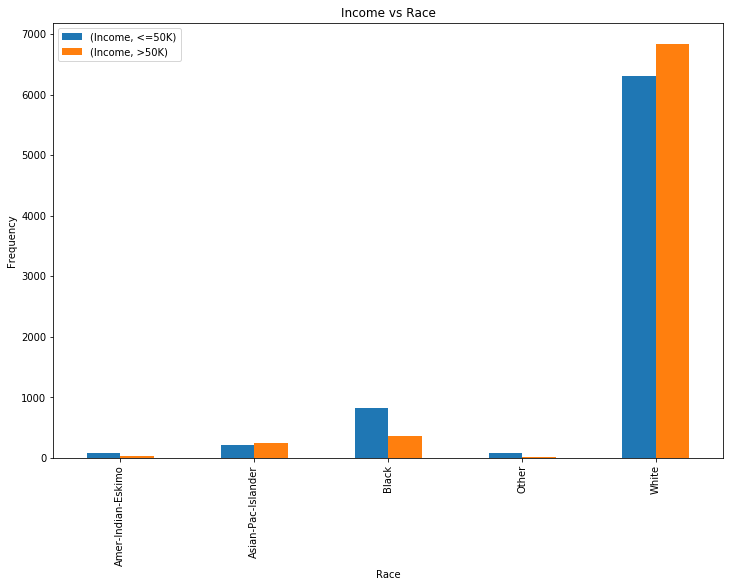

In [19]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Race'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Race')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

### Income vs Sex

Income      
Income  <=50K  >50K
Sex                
Female   2899  1112
Male     4609  6396

Text(0.5,1,'Income vs Sex')

Text(0,0.5,'Frequency')

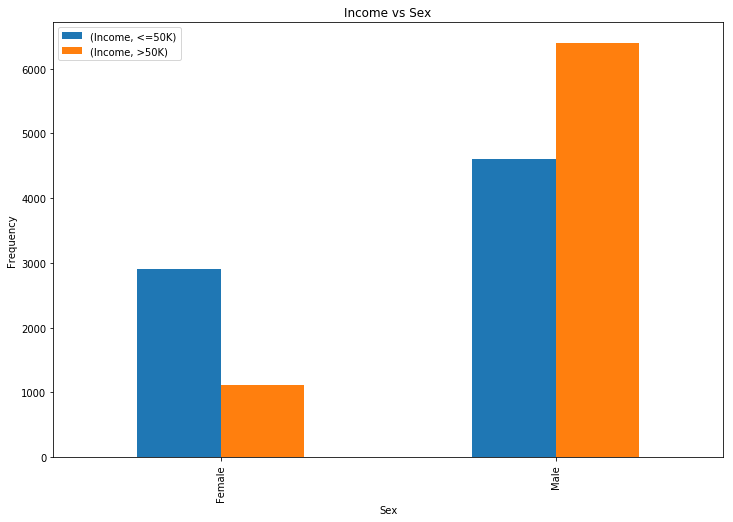

In [20]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Sex'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Sex')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

### Income vs Native-Country

Income        
Income                       <=50K    >50K
Native-country                            
Cambodia                       1.0     7.0
Canada                        21.0    36.0
China                         12.0    20.0
Columbia                      18.0     2.0
Cuba                          21.0    25.0
Dominican-Republic            22.0     2.0
Ecuador                        9.0     4.0
El-Salvador                   39.0     9.0
England                       16.0    30.0
France                         5.0    12.0
Germany                       25.0    44.0
Greece                         6.0     8.0
Guatemala                     20.0     3.0
Haiti                         18.0     4.0
Holand-Netherlands             1.0     NaN
Honduras                       2.0     1.0
Hong                           4.0     6.0
Hungary                        2.0     3.0
India                         22.0    40.0
Iran                           5.0    18.0
Ireland                        5.0     5.0
Italy                         13.0    24.0
Jamaica                       26.0    10.0
Japan                          9.0    23.0
Laos                           5.0     2.0
Mexico                       191.0    33.0
Nicaragua                      9.0     2.0
Outlying-US(Guam-USVI-etc)     4.0     NaN
Peru                           7.0     2.0
Philippines                   47.0    60.0
Poland                        18.0    11.0
Portugal                      13.0     4.0
Puerto-Rico                   33.0    12.0
Scotland                       5.0     2.0
South                         25.0    14.0
Taiwan                         6.0    19.0
Thailand                       5.0     3.0
Trinadad&Tobago                7.0     2.0
United-States               6791.0  6995.0
Vietnam                       16.0     5.0
Yugoslavia                     4.0     6.0

Text(0.5,1,'Income vs Native-country')

Text(0,0.5,'Frequency')

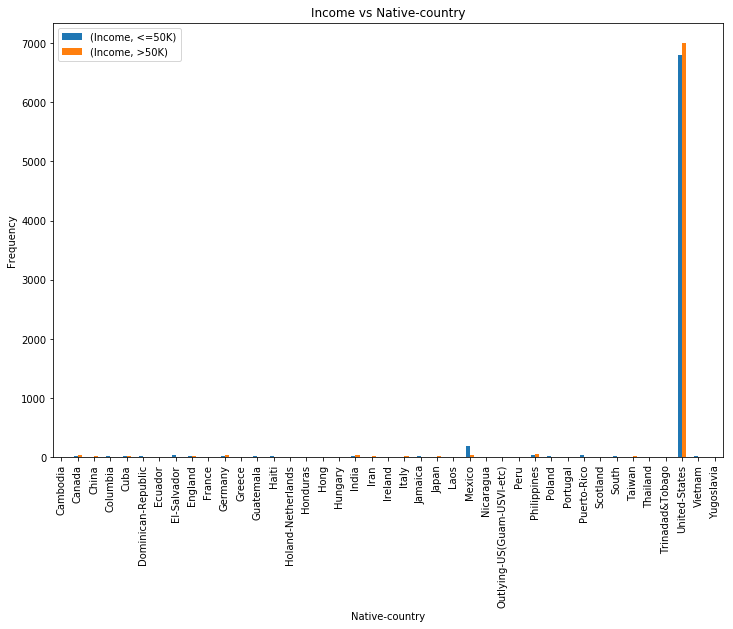

In [21]:
val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Native-country'], aggfunc = 'count')

val_count

ax = val_count.plot.bar(figsize = [12,8])
plt.title('Income vs Native-country')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

## Analyzing Continuous Variables

### Income vs Age

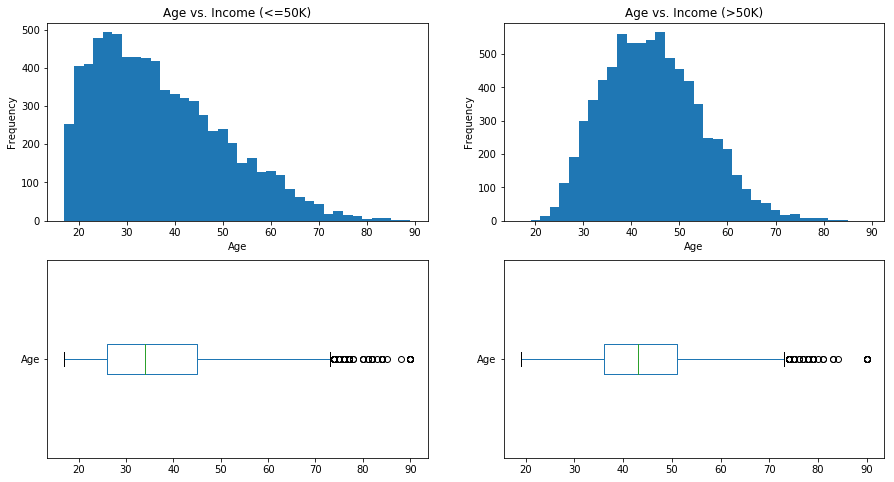

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df[df['Income'] == '<=50K']['Age'].plot.hist(bins = range(df['Age'].min(), df['Age'].max(), 2), 
                                             ax = ax1, figsize = (8,15))
ax1.set_title('Age vs. Income (<=50K)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

df[df['Income'] == '>50K']['Age'].plot.hist(bins = range(df['Age'].min(), df['Age'].max(), 2), 
                                            ax = ax2,figsize = (8,15))
ax2.set_title('Age vs. Income (>50K)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

df[df['Income'] == '<=50K']['Age'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Income'] == '>50K']['Age'].plot.box(ax = ax4, figsize = (15,8), vert = False);

Income      
Income            <=50K  >50K
Age Category                 
(16.927, 25.111]   1817   111
(25.111, 33.222]   1791  1102
(33.222, 41.333]   1459  2056
(41.333, 49.444]   1097  2059
(49.444, 57.556]    705  1396
(57.556, 65.667]    426   595
(65.667, 73.778]    153   142
(73.778, 81.889]     41    37
(81.889, 90.0]       19    10

Text(0.5,1,'Age Category vs Income')

Text(0,0.5,'Frequency')

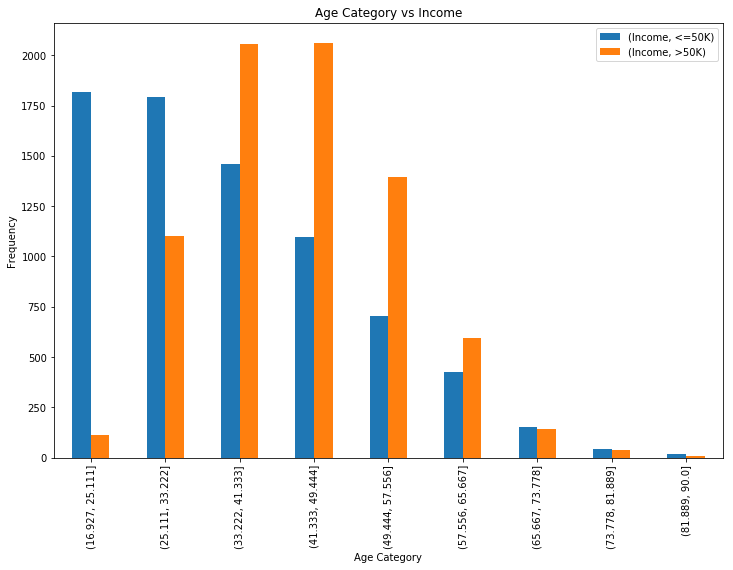

In [23]:
df['Age Category'] = pd.cut(df['Age'], 9)

val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Age Category'], aggfunc = 'count')
val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Age Category vs Income')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

df.drop(['Age'], axis = 1, inplace = True)

### Income vs Final Weight

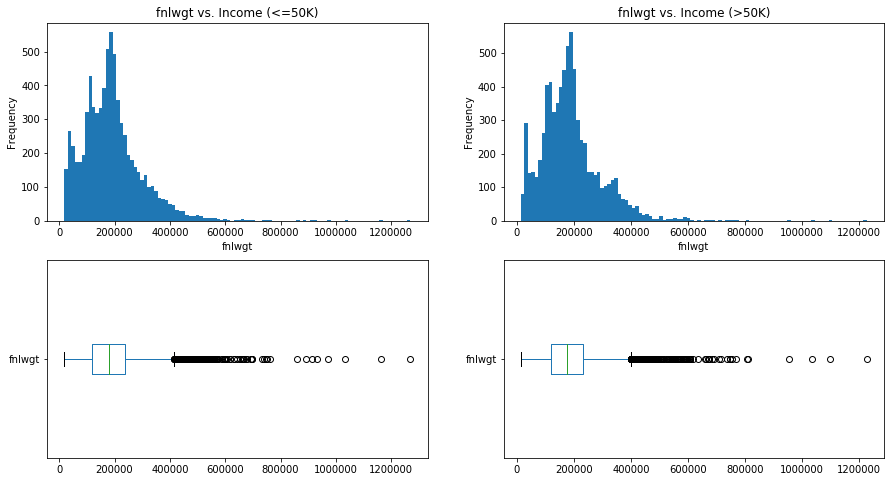

In [24]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df[df['Income'] == '<=50K']['fnlwgt'].plot.hist(bins = 100, ax = ax1, figsize = (8,15))
ax1.set_title('fnlwgt vs. Income (<=50K)')
ax1.set_xlabel('fnlwgt')
ax1.set_ylabel('Frequency')

df[df['Income'] == '>50K']['fnlwgt'].plot.hist(bins = 100, ax = ax2,figsize = (8,15))
ax2.set_title('fnlwgt vs. Income (>50K)')
ax2.set_xlabel('fnlwgt')
ax2.set_ylabel('Frequency')

df[df['Income'] == '<=50K']['fnlwgt'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Income'] == '>50K']['fnlwgt'].plot.box(ax = ax4, figsize = (15,8), vert = False);

In [25]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

### Income vs Education-num

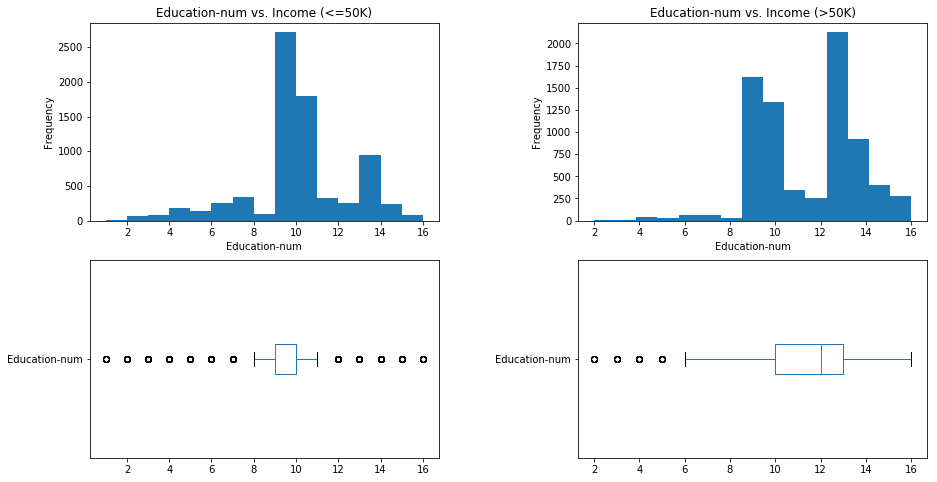

In [26]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
plt.subplots_adjust(wspace = 0.4)

df[df['Income'] == '<=50K']['Education-num'].plot.hist(bins = 15, ax = ax1, figsize = (8,15))
ax1.set_title('Education-num vs. Income (<=50K)')
ax1.set_xlabel('Education-num')
ax1.set_ylabel('Frequency')

df[df['Income'] == '>50K']['Education-num'].plot.hist(bins = 15, ax = ax2,figsize = (8,15))
ax2.set_title('Education-num vs. Income (>50K)')
ax2.set_xlabel('Education-num')
ax2.set_ylabel('Frequency')

df[df['Income'] == '<=50K']['Education-num'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Income'] == '>50K']['Education-num'].plot.box(ax = ax4, figsize = (15,8), vert = False);

Income      
Income               <=50K  >50K
Education-num range             
(0.985, 2.875]          76     6
(2.875, 4.75]          263    47
(4.75, 6.625]          394    84
(6.625, 8.5]           433    88
(8.5, 10.375]         4504  2953
(10.375, 12.25]        577   600
(12.25, 14.125]       1176  3044
(14.125, 16.0]          85   686

Text(0.5,1,'Education-num range vs Income')

Text(0,0.5,'Frequency')

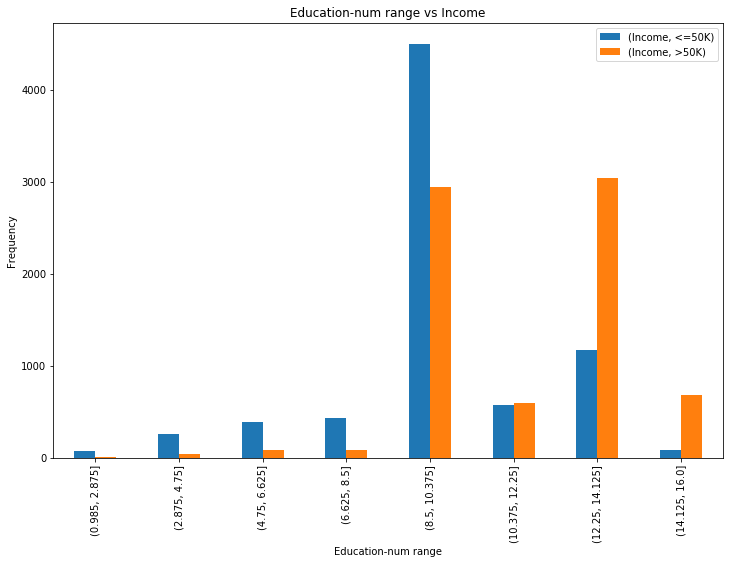

In [27]:
df['Education-num range'] = pd.cut(df['Education-num'], 8)

val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Education-num range'], aggfunc = 'count')

val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Education-num range vs Income')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

df.drop(['Education-num'], axis = 1, inplace = True)

### Income vs Capital-gain

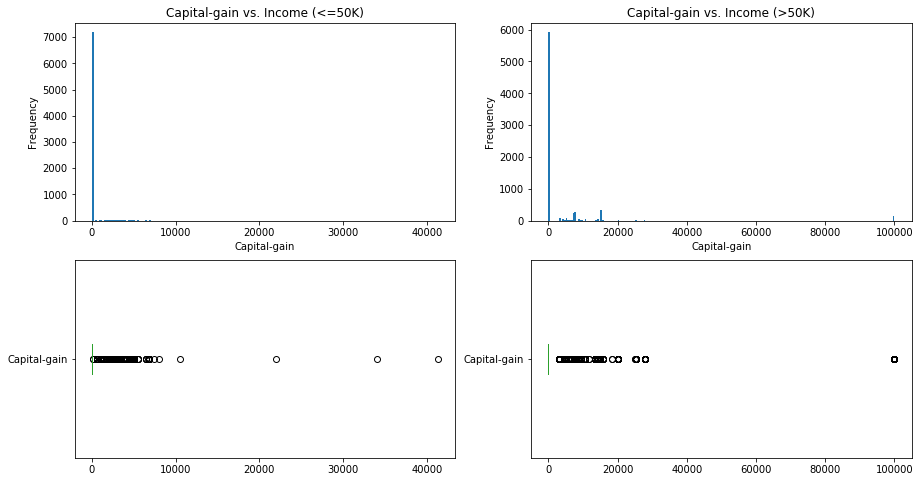

In [28]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df[df['Income'] == '<=50K']['Capital-gain'].plot.hist(bins = 200, ax = ax1, figsize = (8,15))
ax1.set_title('Capital-gain vs. Income (<=50K)')
ax1.set_xlabel('Capital-gain')
ax1.set_ylabel('Frequency')

df[df['Income'] == '>50K']['Capital-gain'].plot.hist(bins = 200, ax = ax2,figsize = (8,15))
ax2.set_title('Capital-gain vs. Income (>50K)')
ax2.set_xlabel('Capital-gain')
ax2.set_ylabel('Frequency')

df[df['Income'] == '<=50K']['Capital-gain'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Income'] == '>50K']['Capital-gain'].plot.box(ax = ax4, figsize = (15,8), vert = False);

Income        
Income               <=50K    >50K
Capital-gain range                
(-99.999, 11111.0]  7505.0  6840.0
(11111.0, 22222.0]     1.0   475.0
(22222.0, 33333.0]     NaN    45.0
(33333.0, 44444.0]     2.0     NaN
(88888.0, 99999.0]     NaN   148.0

Text(0.5,1,'Capital-gain range vs Income')

Text(0,0.5,'Frequency')

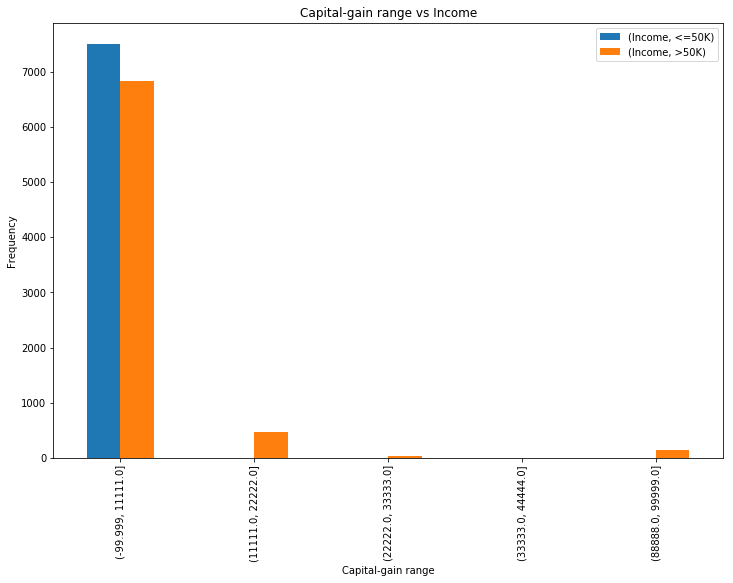

In [29]:
df['Capital-gain range'] = pd.cut(df['Capital-gain'], 9)

val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Capital-gain range'], aggfunc = 'count')

val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Capital-gain range vs Income')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

df.drop(['Capital-gain'], axis = 1, inplace = True)

### Income vs Capital-loss

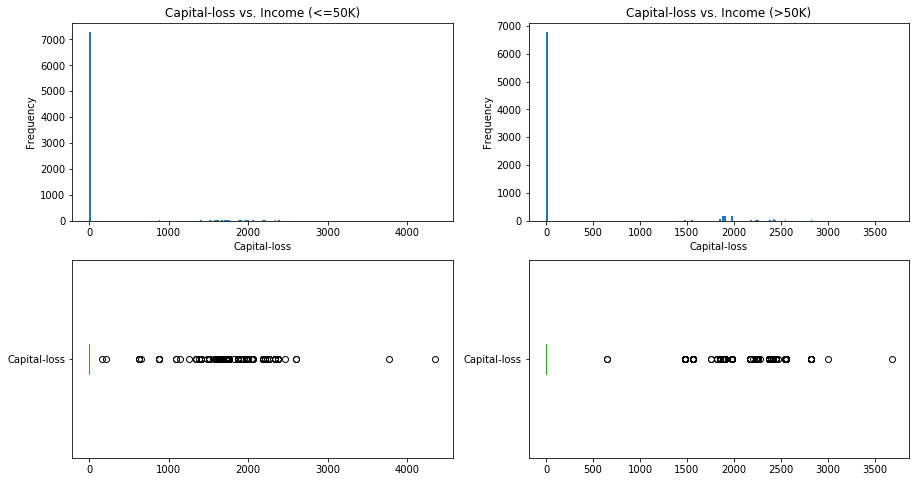

In [30]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df[df['Income'] == '<=50K']['Capital-loss'].plot.hist(bins = 200, ax = ax1, figsize = (8,15))
ax1.set_title('Capital-loss vs. Income (<=50K)')
ax1.set_xlabel('Capital-loss')
ax1.set_ylabel('Frequency')

df[df['Income'] == '>50K']['Capital-loss'].plot.hist(bins = 200, ax = ax2,figsize = (8,15))
ax2.set_title('Capital-loss vs. Income (>50K)')
ax2.set_xlabel('Capital-loss')
ax2.set_ylabel('Frequency')

df[df['Income'] == '<=50K']['Capital-loss'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Income'] == '>50K']['Capital-loss'].plot.box(ax = ax4, figsize = (15,8), vert = False);

Income        
Income               <=50K    >50K
Capital-loss range                
(-4.356, 484.0]     7272.0  6771.0
(484.0, 968.0]         8.0     2.0
(968.0, 1452.0]       14.0     NaN
(1452.0, 1936.0]     144.0   443.0
(1936.0, 2420.0]      65.0   253.0
(2420.0, 2904.0]       3.0    37.0
(2904.0, 3388.0]       NaN     1.0
(3388.0, 3872.0]       1.0     1.0
(3872.0, 4356.0]       1.0     NaN

Text(0.5,1,'Capital-loss range vs Income')

Text(0,0.5,'Frequency')

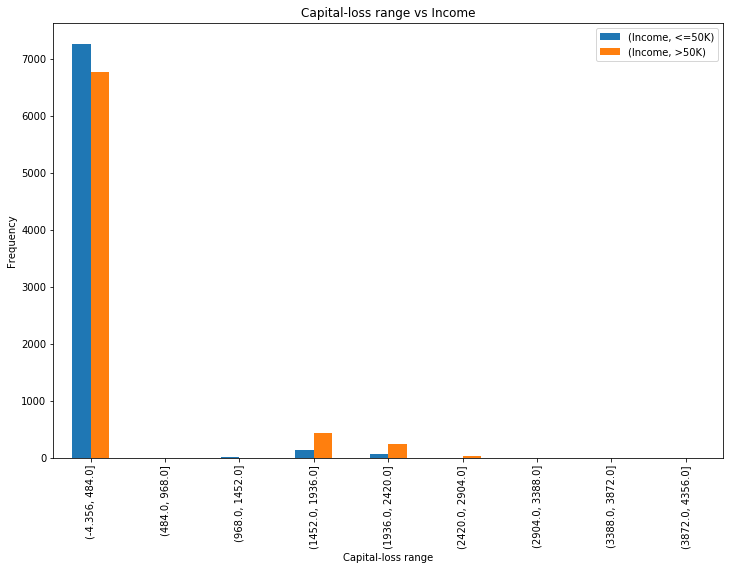

In [31]:
df['Capital-loss range'] = pd.cut(df['Capital-loss'], 9)

val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Capital-loss range'], aggfunc = 'count')

val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Capital-loss range vs Income')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

df.drop(['Capital-loss'], axis = 1, inplace = True)

### Income vs Hours-per-week  

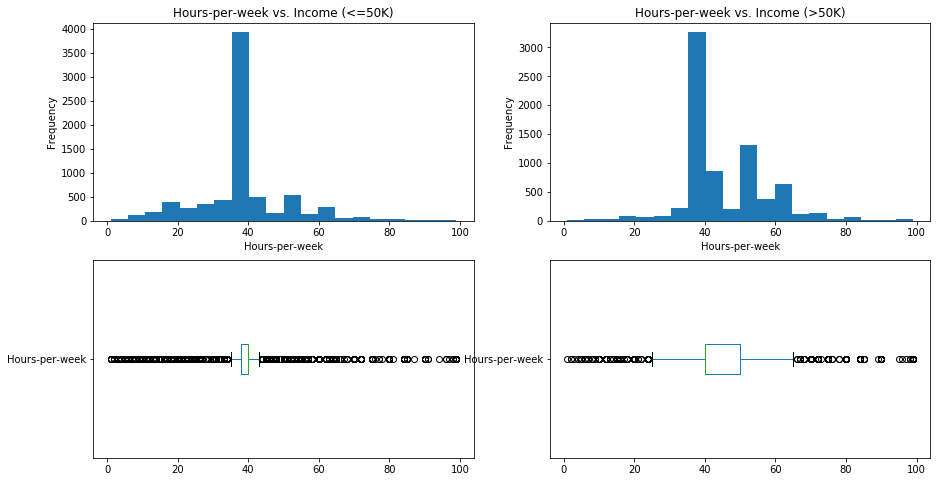

In [32]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df[df['Income'] == '<=50K']['Hours-per-week'].plot.hist(bins = 20, ax = ax1, figsize = (8,15))
ax1.set_title('Hours-per-week vs. Income (<=50K)')
ax1.set_xlabel('Hours-per-week')
ax1.set_ylabel('Frequency')

df[df['Income'] == '>50K']['Hours-per-week'].plot.hist(bins = 20, ax = ax2,figsize = (8,15))
ax2.set_title('Hours-per-week vs. Income (>50K)')
ax2.set_xlabel('Hours-per-week')
ax2.set_ylabel('Frequency')

df[df['Income'] == '<=50K']['Hours-per-week'].plot.box(ax = ax3, figsize = (15,8), vert = False)

df[df['Income'] == '>50K']['Hours-per-week'].plot.box(ax = ax4, figsize = (15,8), vert = False);

Income      
Income                <=50K  >50K
Hours-per-week range             
(0.902, 10.8]           163    38
(10.8, 20.6]            582   114
(20.6, 30.4]            617   137
(30.4, 40.2]           4345  3478
(40.2, 50.0]           1129  2290
(50.0, 59.8]            179   435
(59.8, 69.6]            329   751
(69.6, 79.4]             98   151
(79.4, 89.2]             36    73
(89.2, 99.0]             30    41

Text(0.5,1,'Hours-per-week range vs Income')

Text(0,0.5,'Frequency')

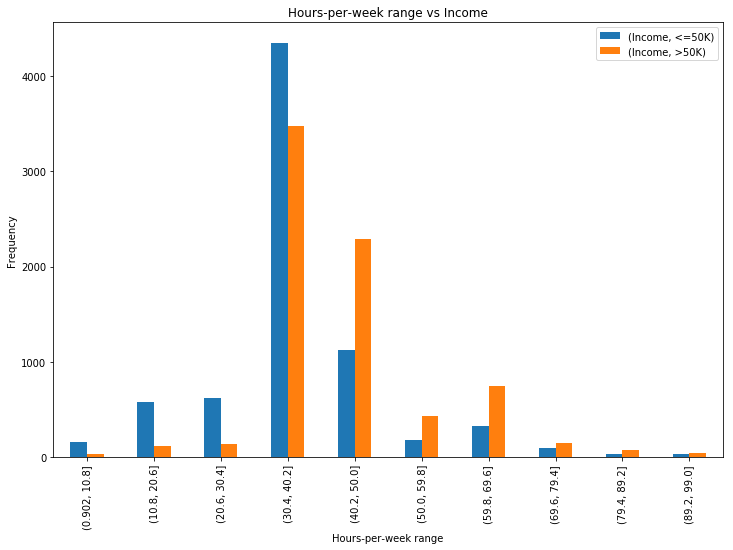

In [33]:
df['Hours-per-week range'] = pd.cut(df['Hours-per-week'], 10)

val_count = df.pivot_table(values = ['Income'], columns = [df.Income], 
                           index = ['Hours-per-week range'], aggfunc = 'count')

val_count

val_count.plot.bar(figsize = [12,8])
plt.title('Hours-per-week range vs Income')
plt.ylabel('Frequency')
plt.legend(loc = 'best')

df.drop(['Hours-per-week'], axis = 1, inplace = True)

In [94]:
# Transforming the target variable into binary form
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})

# Creating Dummy Variables

In [95]:
dummy_list = ['Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 
              'Native-country', 'Age Category','Education-num range', 'Capital-gain range', 
              'Capital-loss range', 'Hours-per-week range']                
              
def dummy_var(df, dummy_list):
    for i in dummy_list:
        dummies = pd.get_dummies(df[i], prefix = i)
        df = df.drop(i, axis = 1)
        df = pd.concat([df, dummies], axis = 1)
    return df

df2 = dummy_var(df, dummy_list)
df2.head()

,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_10th,Education_11th,...,"Hours-per-week range_(0.902, 10.8]","Hours-per-week range_(10.8, 20.6]","Hours-per-week range_(20.6, 30.4]","Hours-per-week range_(30.4, 40.2]","Hours-per-week range_(40.2, 50.0]","Hours-per-week range_(50.0, 59.8]","Hours-per-week range_(59.8, 69.6]","Hours-per-week range_(69.6, 79.4]","Hours-per-week range_(79.4, 89.2]","Hours-per-week range_(89.2, 99.0]"
9889,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31107,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22979,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13718,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31092,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Cross-Validation and Model Selection

In [96]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split

models = {'Gaussian Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier(),
          'Logistic Regression': LogisticRegression(),
          'k-Nearest Neighbors': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'LinearSVC': LinearSVC()}

array = df2.values

X = array[:,1:]
Y = array[:,0]

results = []
std = []

validation_size = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, 
                                                                random_state = 42)

for keys in models.keys():
    clf = models[keys]
    kfold = model_selection.KFold(n_splits = 10, random_state = 42)
    cv_results = model_selection.cross_val_score(clf, X_train, Y_train, cv = kfold, 
                                                 scoring = 'accuracy')
    results.append(cv_results.mean())
    std.append(cv_results.std())

In [97]:
for i in range(len(results)):
    print("{0}{1}: {2:.3f} +/- {3:.3f}".format(list(models)[i], ' Performance Accuracy', results[i], 
                                               std[i]))  

Gaussian Naive Bayes Performance Accuracy: 0.707 +/- 0.022
Decision Tree Performance Accuracy: 0.763 +/- 0.011
Logistic Regression Performance Accuracy: 0.819 +/- 0.012
k-Nearest Neighbors Performance Accuracy: 0.785 +/- 0.011
Random Forest Performance Accuracy: 0.790 +/- 0.011
LinearSVC Performance Accuracy: 0.819 +/- 0.014


# Feature Selection and Modelling

Highest Logistic Regression Training Accuracy: 82.29, Corresponding Testing Accuracy: 81.55, k = 115


Text(0,0.5,'Score')

Text(0.5,1,'Chi-square test scores')

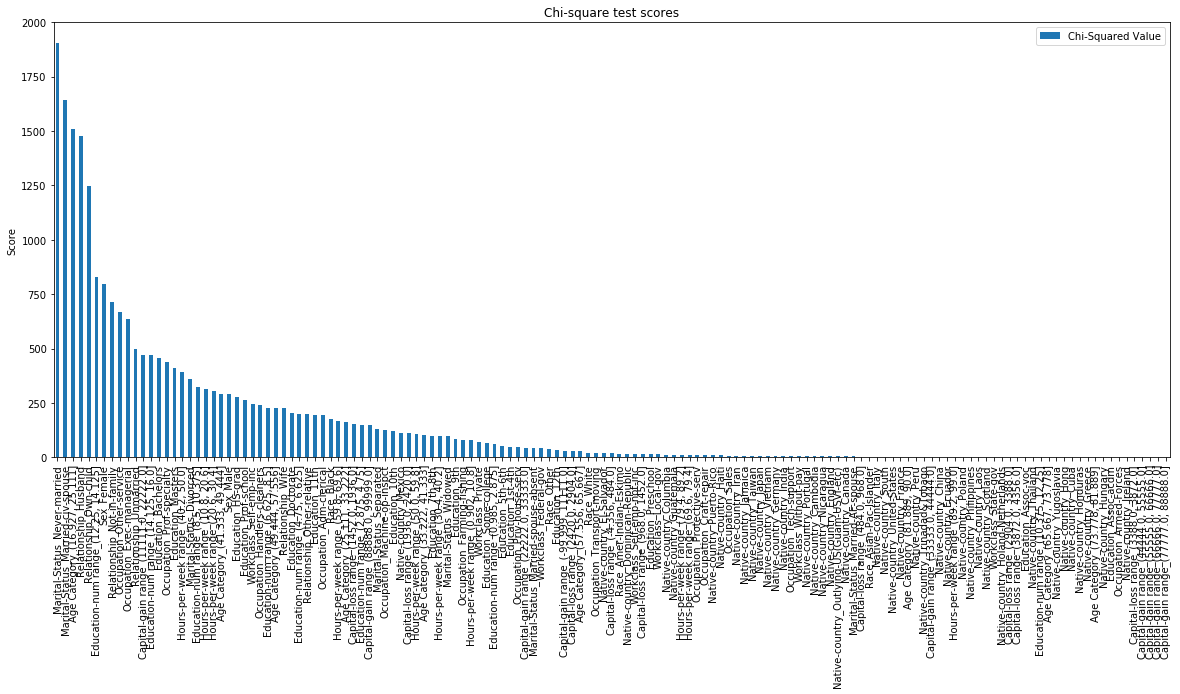

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

train_results = []
test_results = []

k = range(1, 144)

for i in k:
    chi2_selector = SelectKBest(chi2, k = i)
    X_kbest = chi2_selector.fit(X, Y)
    X_features = X_kbest.transform(X)
    
    validation_size = 0.3
    X_train, X_validation, Y_train, Y_validation = train_test_split(X_features, Y, 
                                                                    test_size = validation_size, 
                                                                    random_state = 42)

    clf = LogisticRegression()
    _ = clf.fit(X_train, Y_train) 

    train_score = clf.score(X_train, Y_train)*100
    test_score = clf.score(X_validation, Y_validation)*100
    
    train_results.append(train_score)
    test_results.append(test_score)

print('{0}: {1:.2f}, {2}: {3:.2f}, {4} = {5}'.format('Highest Logistic Regression Training Accuracy', 
                                                max(train_results), 
                                                'Corresponding Testing Accuracy', 
                                                test_results[train_results.index(max(train_results))],
                                                'k', train_results.index(max(train_results)) + 1))

df3 = pd.DataFrame(list(X_kbest.scores_), index = list(df2.columns[1:]), 
                   columns = ['Chi-Squared Value'])        
df3.sort_values('Chi-Squared Value', ascending = False).plot.bar(figsize = (20,8))
plt.ylabel('Score')
plt.title('Chi-square test scores')

# Hyperparameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV

X_new = df2[df3.sort_values('Chi-Squared Value', ascending = False).index[:115]]

X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, Y, test_size = validation_size, 
                                                                random_state = 42)

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['l1', 'l2' ]
param_grid = {'C': C, 'penalty': penalty}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', cv = 5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

{'C': 10, 'penalty': 'l2'}

# Final Predictive Model and Performance Evaluation

In [115]:
clf = LogisticRegression(C = 10, penalty = 'l2')
clf.fit(X_train, Y_train) 

train_score = 'Train score: {0:.2f}'.format(clf.score(X_train, Y_train)*100)
test_score = 'Test score: {0:.2f}'.format(clf.score(X_validation, Y_validation)*100)

train_score
test_score

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

'Train score: 82.33'

'Test score: 81.62'